In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import keras
import tensorflow
import xgboost as xgb
import lightgbm as lgb

from sklearn.decomposition import PCA

In [2]:
df = pd.read_parquet("training_data.parquet")

In [3]:
df.drop(["date", "symbol"], axis=1, inplace=True)

## PCA dimensionality reduction

In [4]:
X = df.drop(["target"], axis=1)
y = df["target"]

print(X.shape)
print(y.shape)

(300, 100)
(300,)


In [5]:
n_components = 85
pca = PCA(n_components)

pca.fit(X)
X_pca = pca.transform(X)

X_pca = pd.DataFrame(X_pca,
                        columns=['PC{}'.format(i+1)for i in range(n_components)]
                       )
print(X_pca.shape)

(300, 85)


In [6]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85
0,-6.673628e+11,-1.110246e+11,1.308525e+11,3.479375e+11,-2.149442e+11,2.415416e+12,2.232229e+11,8.778577e+10,8.237525e+09,-1.063021e+11,...,-2.377786e+08,-8.918670e+08,2.118546e+08,4.218936e+08,-4.160982e+08,-6.854149e+07,3.689220e+08,-1.340746e+09,-3.489518e+07,-3.164311e+07
1,-6.477276e+11,-1.110043e+11,1.341588e+11,3.498620e+11,-2.007858e+11,2.166359e+12,1.815592e+11,5.706301e+10,-5.823675e+09,-9.659588e+10,...,-5.512351e+08,-8.288138e+08,-7.533909e+08,5.369044e+08,-8.525941e+07,-1.209607e+07,1.030951e+07,1.784441e+09,-5.657776e+07,-1.072621e+07
2,-6.555541e+11,-1.112306e+11,1.314443e+11,3.260741e+11,-2.061419e+11,2.169826e+12,2.037413e+11,7.970785e+10,8.320867e+09,-1.155547e+11,...,-4.861348e+07,7.661104e+08,5.535126e+07,-4.327692e+08,1.194455e+08,-1.080683e+08,-1.765395e+08,4.885881e+08,1.314955e+07,1.091229e+07
3,-7.469869e+11,-1.095214e+11,1.066109e+11,2.601447e+11,-1.724672e+11,1.659082e+12,1.756342e+11,8.925764e+10,2.560472e+10,-8.203609e+10,...,2.946509e+08,5.267497e+07,1.843116e+08,-8.835359e+08,-1.089364e+08,1.762629e+08,-1.109779e+08,-1.006451e+09,7.684154e+07,-9.764653e+06
4,-1.152073e+12,-1.359419e+11,1.643452e+11,1.581736e+11,6.697160e+09,9.311485e+10,-3.873731e+10,2.909483e+10,2.978946e+09,8.375636e+09,...,-3.587878e+08,4.199591e+08,8.159189e+08,4.774862e+08,1.114153e+08,7.172742e+07,-3.022617e+08,2.744902e+07,9.439667e+07,-2.450906e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.525594e+12,-4.628846e+10,1.539761e+11,8.360339e+10,9.295856e+10,-2.361857e+11,-2.140818e+09,2.702821e+10,4.912985e+10,-4.652553e+10,...,-1.818076e+07,-1.432562e+07,-1.040245e+08,-1.144125e+08,4.810345e+07,-1.468619e+07,-2.109368e+07,9.939129e+06,8.305087e+05,4.607982e+06
296,1.667205e+12,-3.152972e+11,-4.839764e+10,-1.051227e+11,-4.321636e+11,-3.675547e+11,1.327739e+12,4.898400e+11,-5.471330e+11,3.382300e+11,...,2.665792e+07,8.127878e+07,1.324725e+08,-3.974385e+07,-3.285065e+07,7.416653e+07,3.485753e+06,-1.113440e+07,-2.703210e+05,4.210872e+06
297,9.060654e+11,-2.389212e+11,9.346839e+10,-2.818769e+10,-2.469779e+10,-3.009476e+11,2.185432e+11,1.024967e+12,-4.756137e+11,3.610947e+11,...,2.952790e+08,-5.996078e+08,-2.261887e+08,5.291943e+08,-3.781599e+08,-9.178458e+07,2.415504e+08,1.984778e+08,4.181661e+06,2.563530e+07
298,8.595369e+11,-2.327859e+11,1.147381e+11,9.707590e+09,-6.068896e+09,-3.144500e+11,1.892981e+11,1.027929e+12,-4.741825e+11,2.844996e+11,...,3.520733e+07,1.247744e+09,-5.968289e+07,-4.176926e+07,8.773407e+07,2.855285e+07,-2.011908e+08,-2.052208e+08,1.156394e+07,-1.213916e+06


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [8]:
results = {}

## Logistic regression

In [9]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="lbfgs", penalty="l2", C=0.2))  # taken from initial testing
])

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=0.2))])

In [11]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test dataset score: {accuracy}")

results["Logistic Regression"] = accuracy

Test dataset score: 0.5833333333333334


## SVM

In [12]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(C=4, kernel="rbf"))
])

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=4))])

In [14]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test dataset score: {accuracy}")

results["SVM"] = accuracy

Test dataset score: 0.5833333333333334


## Decision Tree Classifier

In [15]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(ccp_alpha=0.5, criterion="gini", max_depth=4))
])

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(ccp_alpha=0.5, max_depth=4))])

In [17]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test dataset score: {accuracy}")

results["Decision Tree"] = accuracy

Test dataset score: 0.6


## Neural network

In [18]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

In [19]:
model = models.Sequential()

model.add(layers.Input((n_components,)))
model.add(layers.Dense(1000, activation="sigmoid"))
model.add(layers.Dense(64, activation="sigmoid"))
model.add(layers.Dense(32, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

callbacks = EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True)

In [20]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_data=[X_test, y_test], callbacks=callbacks)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.3492 - loss: 1.1811 - val_accuracy: 0.4000 - val_loss: 0.8417
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3317 - loss: 0.8678 - val_accuracy: 0.4000 - val_loss: 0.7328
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3392 - loss: 0.7418 - val_accuracy: 0.4000 - val_loss: 0.6998
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3846 - loss: 0.6976 - val_accuracy: 0.6000 - val_loss: 0.6851
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6583 - loss: 0.6778 - val_accuracy: 0.6000 - val_loss: 0.6774
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6471 - loss: 0.6654 - val_accuracy: 0.6000 - val_loss: 0.6738
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6433 - loss: 0.6584 - val_accuracy: 0.6000 - val_loss: 0.6728
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6596 - loss: 0.6480 - val_accuracy: 0.6000 - 

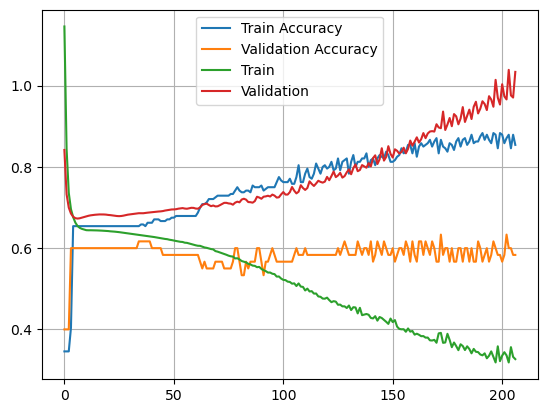

In [21]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.legend()
plt.grid()

In [22]:
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=100)
train_loss, train_acc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6733 - loss: 0.6430


(0.650725245475769, 0.6541666388511658)

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=100)
test_loss, test_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6000 - loss: 0.6728


(0.6728450059890747, 0.6000000238418579)

In [24]:
results["Neural Network"] = test_acc

In [25]:
y_predict = model.predict(X_test, batch_size=100)
y_pred = np.round(y_predict)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.6004478 ],
       [0.6005317 ],
       [0.6004896 ],
       [0.60020065],
       [0.60044026],
       [0.60056573],
       [0.600541  ],
       [0.5979639 ],
       [0.6000364 ],
       [0.59874564],
       [0.59937495],
       [0.6004125 ],
       [0.5987184 ],
       [0.5998969 ],
       [0.60055965],
       [0.60035664],
       [0.6004776 ],
       [0.60058016],
       [0.600471  ],
       [0.6006164 ],
       [0.5969056 ],
       [0.60031426],
       [0.6005559 ],
       [0.6005583 ],
       [0.6003759 ],
       [0.6002184 ],
       [0.6005317 ],
       [0.6004776 ],
       [0.5958044 ],
       [0.599341  ],
       [0.5995253 ],
       [0.6006068 ],
       [0.59957635],
       [0.6004689 ],
       [0.60047853],
       [0.60063934],
       [0.60043937],
       [0.60038877],
       [0.59980345],
       [0.6004122 ],
       [0.60040796],
       [0.59745586],
       [0.6004942 ],
       [0.6004275 ],
       [0.59705734],
       [0.60051876],
       [0.6005111 ],
       [0.600

In [26]:
y_pred = np.round(y_predict)

In [27]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 0, 24],
       [ 0, 36]], dtype=int64)

Text(0.5, 1.0, 'Confusion atrix')

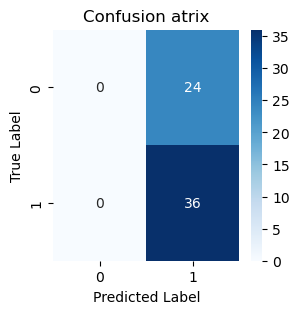

In [28]:
plt.figure(figsize=(3,3))
sns.heatmap(matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=range(2),
            yticklabels=range(2),
           )
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion atrix")

## XGBoost

In [29]:
model = xgb.XGBClassifier(colsample_bytree=0.75, max_depth=6, n_estimators=40, subsample=0.75, tree_method="hist")

In [30]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
# print("Best CV params", grid.best_params_)
# print("Best CV accuracy", grid.best_score_)
print("Test accuracy of best grid search hypers:", model.score(X_test, y_test))

Test accuracy of best grid search hypers: 0.6833333333333333


In [32]:
results["XGBoost"] = model.score(X_test, y_test)

## LightGBM

In [33]:
model = lgb.LGBMClassifier(max_depth=2, n_estimators=30, num_leaves=20, subsample=0.75)

In [34]:
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 157, number of negative: 83
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6889
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.654167 -> initscore=0.637405
[LightGBM] [Info] Start training from score 0.637405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(max_depth=2, n_estimators=30, num_leaves=20, subsample=0.75)

In [35]:
# print("Best CV params", grid.best_params_)
# print("Best CV accuracy", grid.best_score_)
print("Test accuracy of best grid search hypers:", model.score(X_test, y_test))

Test accuracy of best grid search hypers: 0.6


In [36]:
results["LightGBM"] = model.score(X_test, y_test)

## Results

In [37]:
results

{'Logistic Regression': 0.5833333333333334,
 'SVM': 0.5833333333333334,
 'Decision Tree': 0.6,
 'Neural Network': 0.6000000238418579,
 'XGBoost': 0.6833333333333333,
 'LightGBM': 0.6}